##House_Price_Prediction

# Finding type of a model

As we are going to start with a dataset, there are few questions which we should know before building a model

Finding Which Type of model we want to build:

In this case we'll use Supervised learning because we are given with a dataset which has features(inputs) and labels(outputs).Also we will go for a Regressive model as want to predict house price and classification just classifies a trait about given features

**Batch_learning**:In this technique we have a dataset, and we build our model on that data

**Online_learning:**In Online Learning we create such a pipeline which is connstantly changed by upcoming data and our model keeps training on that data

For this project, we'll use Batch learning as we are working on a giving dataset



# Model's Performance measure

For detecting model's Performance, which approach we'll use? Mean Absolute Error,Manhattan norm,Root mean square error,etc

So for Regressive Tasks we usually consider RMSE.Also we have to check that details and assumptions  which we are making about our model are good enough

First of all we will load our dataset

In [ ]:


import pandas as pd
house=pd.read_csv('house_data_2_.csv')
house.head() #It gives first five rows

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
house.info() #To get dataset description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            409 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
house['No'].value_counts()

No
1      1
273    1
283    1
282    1
281    1
      ..
136    1
135    1
134    1
133    1
414    1
Name: count, Length: 414, dtype: int64

We can use .describe() function to check count , mean, standard deviation ,minimum & maximum value, values less than a certain percentage

In [ ]:
house.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,409.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.584597,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.351953,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,8.900000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,27.600000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


We will use matplotlib to draw histograms which will give us visual representation of all features

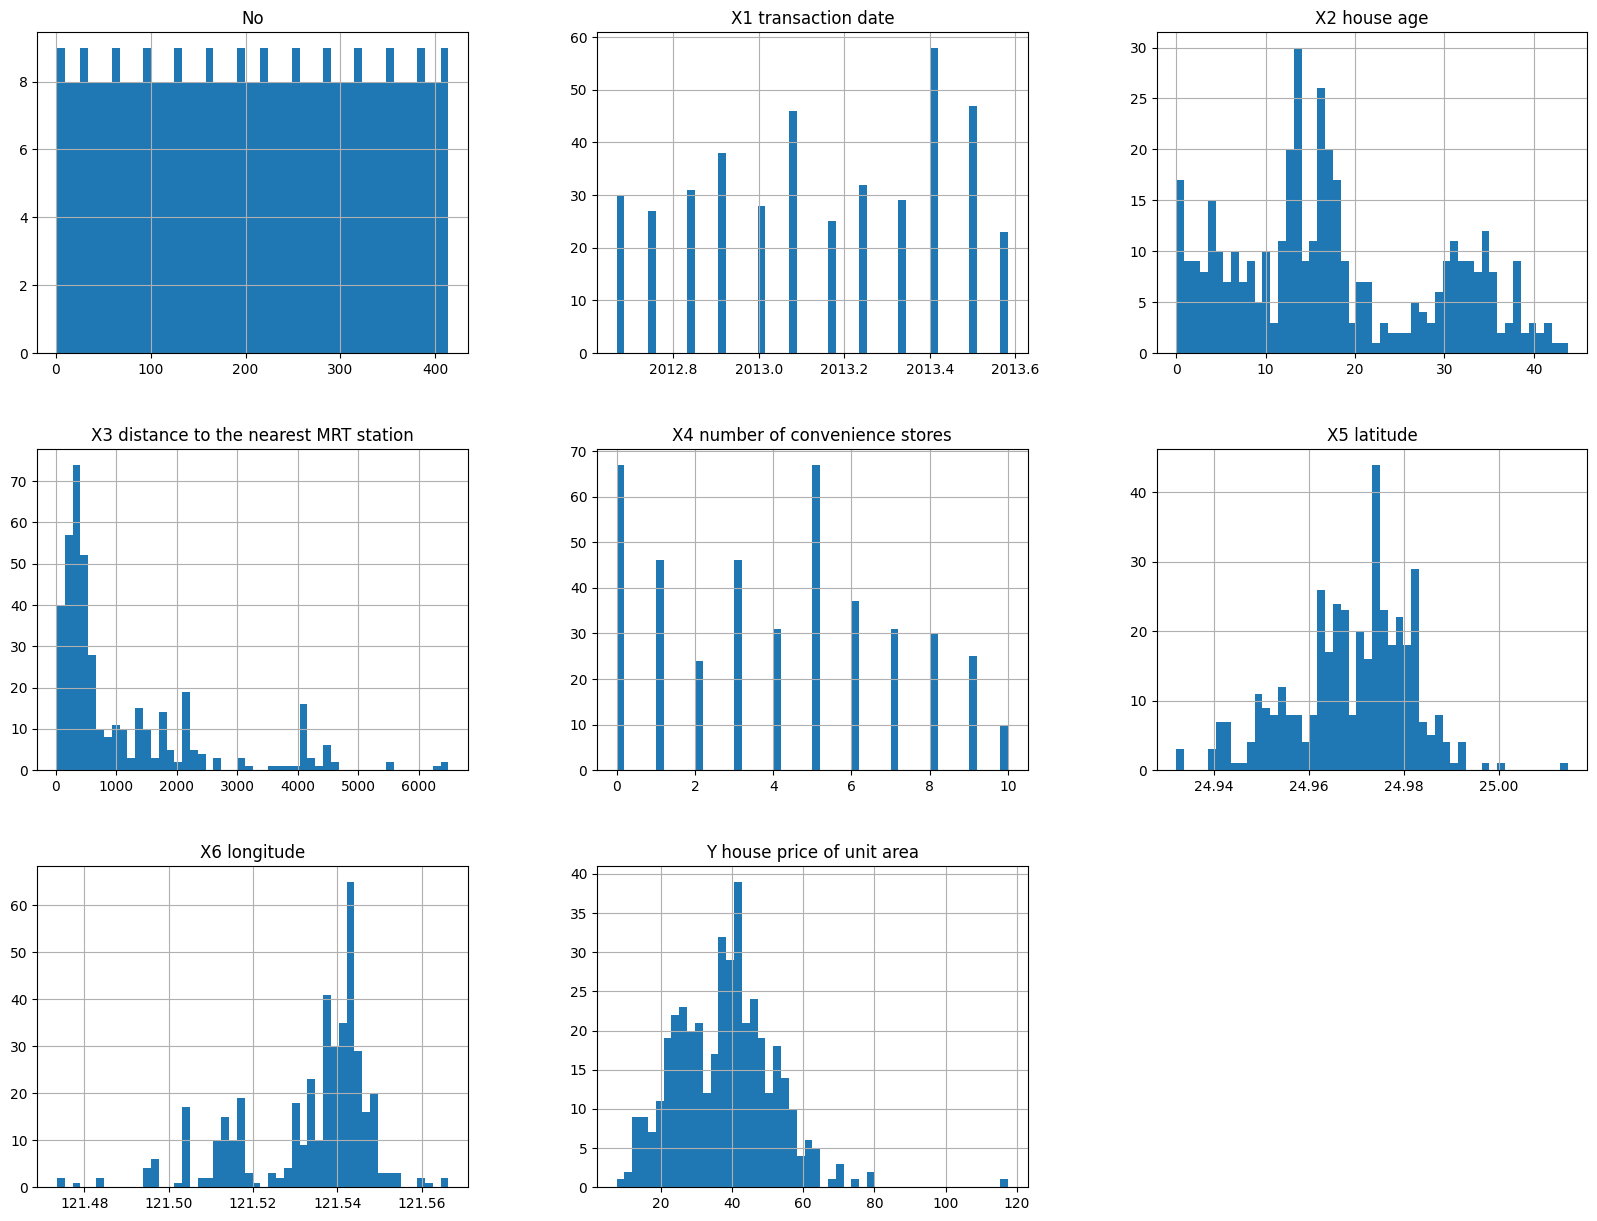

In [ ]:
import matplotlib.pyplot as plt
house.hist(bins=50,figsize=(20,15))
plt.show()

# **Training and Testing**

We will write split_train_test function to understand it's working despite of the fact that it is already given in scikit learn

In [ ]:
import numpy as np

def split_train_test(data,test_ratio):
  np.random.seed(42) #It is set to ensure that same numbers will be generated even if program run's again and again
  shuffled=np.random.permutation(len(data))#It will shufffle permutation of length of data
  print(shuffled)
  test_set_size=int(len(data)*test_ratio)
  test_indices=shuffled[:test_set_size]
  train_indices=shuffled[test_set_size:]
  return data.iloc[train_indices],data.iloc[test_indices]


In [ ]:

train_set,test_set=split_train_test(house,0.2)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}")

[358 350 373 399 369  72 262 140  93  70 118 131 336  55 126 376  56 291
 365  84 116   9 374 137 320 402 231  90  94 173  30 141 104  79  33 290
 286 409 222 361  15 311   0 317 272 124 271 184 275 360 225 355 364 274
 175  73  42 165  77  39 401  25 155 180 347 266  22  46  78 152  82  76
  57 110  24  17 238 405  31 283 157 203 208 192 234   5  45 245 346 195
 382 400 296   3  18 250  60 390 408  63 261 297 113 248 326 410 391 352
 132 237 108 101 193  29 307 386 305 114 247  75 268 148  16  66 341   7
 194  19 176 367 304 198 145 265 109 202 196 396 239  83 168 323  74 383
 119 209 219 153 177 387 371  36 139 338 172 211 332  59 111 284 325   6
 299 285 158 150  10 331 103  81 278 258 167 388 223 229 181 227  89 389
 163 147 246  92  69 123  96 143 362  97 249  68  23  37 144 122 228 182
  67 340 244 394 384 329 210 125 146 289  86 412 220 349 327 356 314 183
 218 294 333 392 129  38  11 280 185 281 112 179 301 366 337 117 381 287
 398 298 233 375 255 164 354 136 154 199 197 406   

In [ ]:

from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(house,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}")

Rows in train set:331
Rows in test set:83


In [ ]:
house=train_set.copy()

In [ ]:
#Now we will separate features and labels

train_features = train_set.drop('Y house price of unit area', axis=1)
train_labels = train_set['Y house price of unit area']
test_features = test_set.drop('Y house price of unit area', axis=1)
test_labels = test_set['Y house price of unit area']

It is possible that a feature has values like  0 or 1 , and for train set our model is only exposed to values like 1 (in other words our model doesn't know that this feature can also have value 0) so we have to do **stratified sampling**

We'll have to look for a  feature in our dataset that is of utmost importance(such that we cannot leave that feature), so on basis of that feature we can go for stratified sampling

For Stratified Sampling we should have atleast 2 distinct values so that our test and train dataset could have uniform distribution but in our case each feature in our dataset has only one value

In [ ]:
print(house['X2 house age'].value_counts())

X2 house age
0.0     15
16.4     6
13.6     6
13.3     6
16.9     5
        ..
4.8      1
1.8      1
8.1      1
37.2     1
4.6      1
Name: count, Length: 208, dtype: int64


In [ ]:
#from sklearn.model_selection import StratifiedShuffleSplit
#from sklearn.model_selection import StratifiedShuffleSplit
#split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
#for train_index,test_index in split.split(house,house['X2 house age']):#I have selected house age feature for stratified sampling
#  strat_train_set=house.loc[train_index]
#  strat_test_set=house.loc[test_index]
#  strat_test_set()

## **Correlations**

We can use .corr() function of pandas library to see the relationship between different features and the label(Price of a house in this case) in a dataset

In [ ]:
corr_matrix=house.corr()
corr_matrix['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.554251
X5 latitude                               0.531052
X6 longitude                              0.495413
X1 transaction date                       0.074785
No                                       -0.053457
X2 house age                             -0.216881
X3 distance to the nearest MRT station   -0.657009
Name: Y house price of unit area, dtype: float64

array([[<Axes: xlabel='Y house price of unit area', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X1 transaction date', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X1 transaction date'>,
        <Axes: xlabel='X1 transaction date', ylabel='X1 transaction date'>,
        <Axes: xlabel='X2 house age', ylabel='X1 transaction date'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X2 house age'>,
        <Axes: xlabel='X1 transaction date', ylabel='X2 house age'>,
        <Axes: xlabel='X2 house age', ylabel='X2 house age'>]],
      dtype=object)

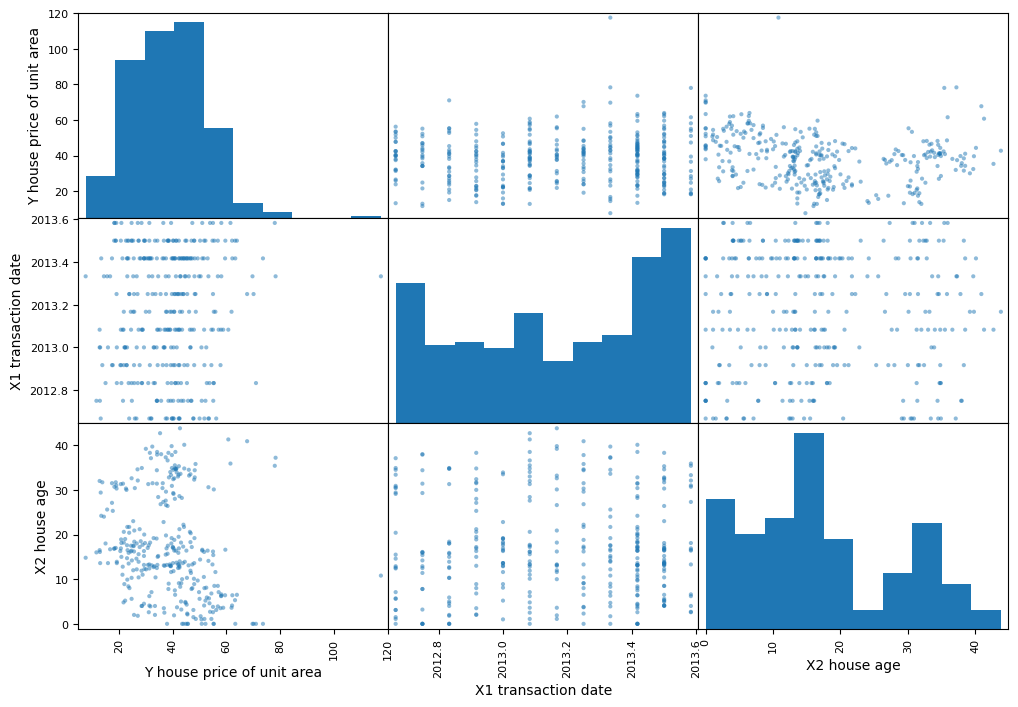

In [ ]:
from pandas.plotting import scatter_matrix
attributes=["Y house price of unit area","X1 transaction date","X2 house age"]
scatter_matrix(house[attributes],figsize=(12,8))

<Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>

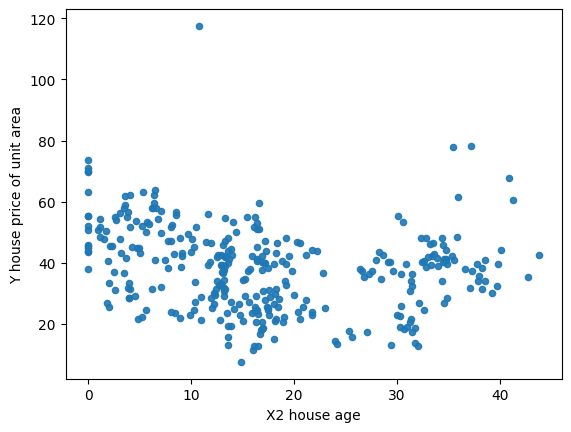

In [ ]:
house.plot(kind='scatter',x='X2 house age',y='Y house price of unit area',alpha=0.9)

## **Attribute Relations**

Here are we going to make another feature by making relation between already present attributes

In [ ]:
#house['Average_size_of_house']=house['X3 distance to the nearest MRT station']+house['X4 number of convenience stores']/2
#house.head()

### Missing Attributes

Now I will delete some values from my dataset in order to see that how we can handle missing values.

To take care of missing attributes, we have three options:

1.Get rid of the missing data points

2.Get rid of the whole attribute which contains missing values

3.Set the value to some value(0,mean or median)

In [ ]:
#For Point 1, we can drop missing values
a=house.dropna(subset=['X2 house age'])  #It will not change the original data we will just obtain a copy
a.shape

(327, 8)

In [ ]:
#For Point 2,drop whole column
b=house.drop('X2 house age',axis=1)
b.shape

(331, 7)

In [ ]:
#For Point 3, fill missing values with median
median=house['X2 house age'].median()
house['X2 house age'].fillna(median)

192    43.8
234     8.0
5       7.1
45     15.9
245     7.5
       ... 
71     35.5
106    17.2
270    10.8
348     4.6
102     1.1
Name: X2 house age, Length: 331, dtype: float64

In [ ]:
house.shape

(331, 8)

We have a class in sklearn to do the above task called imputer(for removing missing values)

In [ ]:

from sklearn.impute import SimpleImputer
#house.drop(subset=['Y house price of unit area'])
imputer=SimpleImputer(strategy='median')
imputer.fit(house)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_ #To check values which imputer calculted for misssing values

array([ 214.     , 2013.167  ,   15.9    ,  492.2313 ,    4.     ,
         24.9711 ,  121.53917,   39.3    ])

In [ ]:

X=imputer.transform(house)
house_tr=pd.DataFrame(X,columns=house.columns)
house_tr.shape

(331, 8)

We should impute our training data only but here we used complete dataset which is not a good practise when we are building a robust machine learning model

## **Scikit_Learning_Basic_Design**

We can see those things on scikit_learn website which can be done by using this library.But primarily there are only three types of objects which are used in scikit learn

**1.Estimators** --It estimates some parameters based on a dataset e.g.,imputer .It has a fit method and transform method. Fit method is used for fitting data into the model and calculates internal parameters

**2.Transformers**-- Transform method takes input and returns output based on the learnings from fit().It also has a convenience function called fit_transform()
which fits and then transforms

**3.Predictors** --Linear Regression model is an example of predictor. fit() and predict() are two common functions.It also gives score() function which will evaluate the predictions

## **Feature_Scaling**

Our model will work  better if we have features in the same scale.So primarily, two types of features scaling methods:

1.Min_max sacling (normalization)
(Value-Min)/(Max-Min)
Scikit learn provides a class called MinMaxscaler for this. All values will lie in scale 0 & 1

2.Standarization
(value-mean)/std
Sklearn provides a class called StandardScaler for this


## **Pipeline_Creation**

We will create pipeline to automate our working

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])


In [ ]:

train_features_prepared=my_pipeline.fit_transform(train_features)

train_features_prepared.shape

(331, 7)

## **Selecting a model**

To find a desired model,  we will do training and then evaluate our model to check that whether it needs another model or the selected one is working correctly

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model=LinearRegression()
#model=DecisionTreeRegressor()
#model=RandomForestRegressor()
model.fit(train_features_prepared,train_labels)

LinearRegression()

In [ ]:
train_features_predictions=model.predict(train_features_prepared)
train_features_predictions

array([38.6466334 , 33.95639859, 32.08082472, 45.86456123, 45.3820058 ,
       34.00350395, 40.07957312, 12.5487183 , 39.96263796, 41.44462362,
       49.46055345, 47.5473174 , 39.39079974, 35.0020169 , 43.76283565,
       31.04674137, 48.43518456, 29.48674053, 33.40344748, 43.77218791,
       30.8132658 , 48.15549102, 48.41947206, 30.34871761, 25.4929792 ,
       40.98041905, 38.45436962, 37.15052516, 40.39696965, 48.47697839,
       46.45429068, 19.36773357, 40.48132525, 44.91695367, 43.69014663,
       31.36242205, 33.01583779, 45.59934566, 15.58420803, 51.64045379,
       47.67360507, 37.61793084, 47.96144789, 15.87643917, 48.32194163,
       12.76831218, 29.84313202, 34.3780566 , 39.97093031, 46.27207051,
       39.84917932, 37.44622659, 33.55836692, 37.7095942 , 26.78388181,
       34.6496212 , 25.1755744 , 37.18603747, 43.5152594 , 53.15215897,
       36.01962473, 48.05906359, 40.9373537 , 42.10408141, 43.71790647,
       44.78758891, 30.48679991, 44.11901098, 31.1389792 , 39.78

In [ ]:

#random_data=house.iloc[5:10]
#random_labels=house['Y house price of unit area'][5:10]
#prepared_data=my_pipeline.transform(random_data)
#a=model.predict(prepared_data)
#print(a)
#

In [ ]:
#random_data

In [ ]:
#random_labels

## **Model Evaluation**

In [ ]:

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(train_labels,train_features_predictions)
rmse=np.sqrt(mse)
rmse    #When Rmse is equal to zero it shows that our model is over fitted

9.105207553507762

## **Cross Validation**

In [ ]:

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,train_features_prepared,train_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores

array([ 9.90437262,  8.26585367,  8.19861431,  9.25113152,  6.97751902,
        8.41567469,  7.5505258 ,  9.36890215,  7.97224864, 14.91281301])

In [ ]:

#model.predict(prepared_data)

So after checking error it can be een that our linear Regression model is working excellently  so I will use linear regression model

In [ ]:
def print_scores(scores):
  print("Scores:",scores)
  print("Mean:",scores.mean())
  print("Standard deviation:",scores.std())

In [ ]:
print(print_scores(rmse_scores))

Scores: [ 9.90437262  8.26585367  8.19861431  9.25113152  6.97751902  8.41567469
  7.5505258   9.36890215  7.97224864 14.91281301]
Mean: 9.081765541674052
Standard deviation: 2.11380819486646
None


After Evaluating models like LinearRegression ,Decision Tree,RandomForestRegressor we obtained following results


**Linear Regression**

rmse:9.105207553507762

Scores: [ 9.90437262  8.26585367  8.19861431  9.25113152  6.97751902  8.41567469
  7.5505258   9.36890215  7.97224864 14.91281301]

Mean: 9.081765541674052

Standard deviation: 2.11380819486646


**Decision Tree Regressor**

rmse:0.0 (model is overfitted so we'll use cross valiadtion)

[10.53043209  6.15612531 11.90614814 16.09604695  6.96821789  9.34028421
  8.83013092 15.24866611  7.87591265 16.05679314]

Mean: 10.900875741162803

Standard deviation: 3.5703873251351714


**RandomForestRegressor**

rmse:3.0473860181812613

Scores: [ 8.05947362  5.68321457  8.10963644 10.1141801   5.91212327  8.13770444
  6.66449248  6.34309748  7.28366942 14.02802678]

Mean: 8.033561858462352

Standard deviation: 2.3579414750142216


So RandomForestRegressor is best model so far with rmse value of 3.0473860181812613

In [ ]:
#from joblib import dump,load
#dump(model,'')


## **Model Evaluation on Test data**

In [ ]:
test_features_prepared=my_pipeline.transform(test_features)
test_predictions=model.predict(test_features_prepared)
test_mse=mean_squared_error(test_labels,test_predictions)
test_rmse=np.sqrt(test_mse)
test_rmse



7.388831925218031

In [ ]:
scores = cross_val_score(model, train_features_prepared, train_labels,
                         scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
print("Cross-validation RMSE scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Cross-validation RMSE scores: [ 9.90437262  8.26585367  8.19861431  9.25113152  6.97751902  8.41567469
  7.5505258   9.36890215  7.97224864 14.91281301]
Mean: 9.081765541674052
Standard deviation: 2.11380819486646


Prediction on random data

In [ ]:
random_data = test_features.iloc[5:10]
prepared_data = my_pipeline.transform(random_data)
a = model.predict(prepared_data)
print("Predictions on random data:", a)

Predictions on random data: [45.8085625  44.32187046 46.69607238 24.3932446  54.92701198]


In [ ]:
#Rmse

random_mse=mean_squared_error(test_labels[5:10],a)
random_rmse=np.sqrt(random_mse)
random_rmse

7.392114251346215